# Fundamentals of Social Data Science
# Week 4 Day 2. Network Analysis 

In this lab I demonstrate three different approaches to creating networks of users from subreddits. These can be used in order to represent user interaction data as a network. Each network will represent the data in slightly different way and can be considered as such. Interestingly, these are all created from the same table of comments. 

We first create our list of posts as before. But this time around we then go to each story and collect the comments. Please note that this is not a full set of comments for any given story but the comments that Reddit would show when you go to that page. That is, it does not include comments buried under 'more comments'. But with a list of comments we can create these networks below: 

## Types of Networks

|Type of Network|Code|Elaboration|
|:-----|:-----|:-----|
|**Threaded netwokrks**|`create_comment_tree`|1. Each post will be a single meta-thread (a series of threads) <br><br>2. If _root=True_, then it will create a node for the post and then connect all the nodes to that post <br><br>3. Look to metrics like 'geodesic' in networks to collect the deepest or widest thread and compare across posts|
|**User-interaction networks**|`create_user_interaction_network(comments_df)`|1. While we have posts, these have author <br><br>2. So an author can reply to someone more than once or people can reply to each other<br><br>3. So if we build a network around who replies to whom rather than which post replies to which post, we no longer have a tree structure<br><br>4. But do we have a dense core? Do we have many different components or one big component (i.e. everyone replying to everyone else).
|**Bipartite networks** (2 separate sides) / **2-mode network**|`create_user_post_network(comments_df)`|1. We can explore which users share a sub in common or which subs share users in common<br><br>2. Seen as a bipartite (i.e. **two separate side** ) network<br><br>3. In social network analysis is this often also called a two-mode network|

Today, you're encouraged to play with the parameters below. What if we download more posts? Do you find that the user-interaction network is very clustered or a big hairball of replies? These structures help build intuition though they may or may not be easy to directly integrate in any analysis of your topic. Nonetheless, I hope that networks helps you think about how to appreciate data at scale and potentially provides a new framework for approaching relations between people, social structure, and social data science questions more broadly.

You are welcome to tweak the code as you see fit. This lab is much like the earlier t-SNE lab in that you are encouraged to explore and see what patterns seem coherent to you. Confirmatory statistics with networks are very tricky but descriptive statistics and inductive insights are readily available. 

Note that the `get_post_comments` does not have a caching function. You may consider caching or other ways to store the user data rather than redownloading it. Also, consider that because we are trying to leave a light footprint on Reddit, this code sleeps for 2 second between requests. Finally, notice that now we have a more general RedditScraper. The only real difference is that we have a "sort" parameter so you can sort by 'top' or 'new'. 

These exercises are optional but should guide your consideration. 

**Exercise 1**. Visualize the comment structore of 5 top stories from a subreddit of choice. 

**Exercise 2**. Create a Jaccard similarity score for three posts based on their overlap in users in the comments. 

**Exercise 3**. How might you create a plot where the nodes are sized differently depending on centrality? Why can't we just take raw scores for the size (hint, it will make nodes very tiny).

**Exercise 4**. Consider why cosine similarity might make sense. In this case, try Eucliean and Jaccard as well to consider their own respective logic. Euclidean will likely find users who are positionally central where cosine should find users who are positionally similar. 

# Attempting Exercises

## Step 0: Import pre-requisite libraries

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import pandas as pd
from models.reddit_scraper import RedditScraper
from config.settings import USER_AGENT
from matplotlib import pyplot as plt
import networkx as nx
from utils.network_builder import *
import time


## Step 1: Download top 3 posts from a subreddit

In [10]:
# 1. Get the top 3 posts from a subreddit
subreddit_name = "Marvel"
scraper = RedditScraper(USER_AGENT)
posts = scraper.get_subreddit_posts(subreddit_name, limit=3, cache=False, sort="top")
posts_df = pd.DataFrame(posts)
display(posts_df)



Fetching posts from https://api.reddit.com/r/Marvel/top
Response keys: dict_keys(['kind', 'data'])


,id,title,selftext,author,score,created_utc,num_comments,url
0,1gklgnv,What is the biggest waste in the mcu in your o...,,Throwaway253896,725,1.730852e+09,176,https://i.redd.it/cvy9ky1xa6zd1.jpeg
1,1gkgh1z,How many villains has The Punisher actually ki...,,Extension-Oil-4680,690,1.730839e+09,118,https://i.redd.it/xlp6k7qn75zd1.jpeg
2,1gkit8v,Who is the grosses villain (Or Hero) in Marvel...,I know there's probably worse people like Bull...,Extension-Oil-4680,274,1.730845e+09,130,https://i.redd.it/b3dky69hp5zd1.jpeg


## Step 2: Get comments from the posts

In [11]:
# 2. Get the comments of the posts
comment_list = []

for post in posts:
    comments = scraper.get_post_comments(post['id'])
    comment_list.append(pd.DataFrame(comments))
    time.sleep(2)

comments_df = pd.concat(comment_list)

Fetching comments from https://api.reddit.com/comments/1gklgnv
Fetching comments from https://api.reddit.com/comments/1gkgh1z
Fetching comments from https://api.reddit.com/comments/1gkit8v


## Step 3: Display comments of the posts

In [12]:
# 3. Display comments of the posts

comments_df

,comment_id,parent_id,post_id,author,body
0,lvm7axq,None,1gklgnv,ShitShowcialist,It’s Mads Mikkelson.
1,lvm8prx,lvm7axq,1gklgnv,MasonL52,And Christian Bale
2,lvm98dl,lvm8prx,1gklgnv,Earth513,THIS! The character that made me actually like...
3,lvmac8n,lvm98dl,1gklgnv,MasonL52,I firmly believe that most superhero movies ca...
4,lvogtuq,lvmac8n,1gklgnv,mcnuggetfarmer,"Shout out to RoboCop bad guy\n\n ""can you fly ..."
...,...,...,...,...,...
125,lvpt8cl,None,1gkit8v,Cautious_Artichoke_3,Mandrill. Red butted primate with the mutant ...
126,lvlt6qn,None,1gkit8v,Otherwise-Sky1292,"Don’t see Stacy X mentioned, less said about h..."
127,lvlsb9v,None,1gkit8v,blackbutterfree,~~Bulimia~~ Big Bertha/Ashley Crawford: Can sh...
128,lvm0i1c,None,1gkit8v,EgoFreeUnMe,"It’s O N—SIGHT with Purple Man, using Grimace ..."


## Step 4: Visualise User Interactions

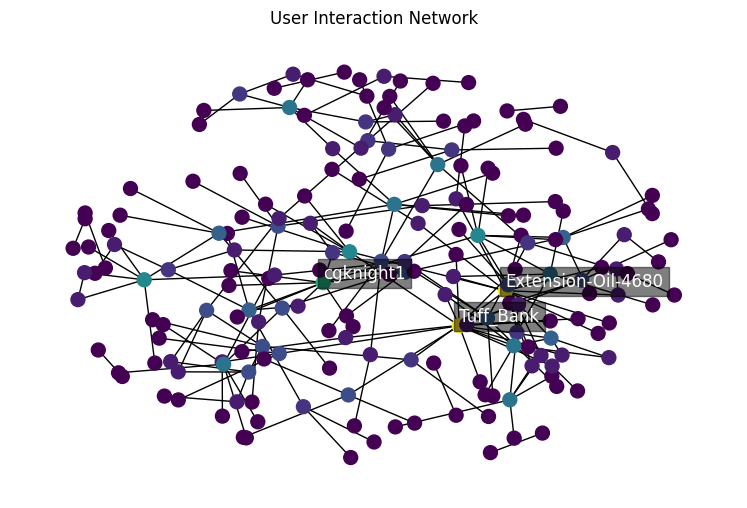

In [24]:
# Visualization user interactions

# Create empty subplot
plt.figure(figsize=(15, 10))

# User network
plt.subplot(221)

# Create undirected network of user interactions
user_network = create_user_interaction_network(comments_df)

# Arrange in spring_layout
pos_users = nx.spring_layout(user_network, k=1, iterations=200)

# Calculate the degree centrality for each node in the `user_network` graph
degree_centrality = nx.degree_centrality(user_network)

# Creates a list of colours for each node based on their degree centrality
node_color = [degree_centrality[node] for node in user_network.nodes()]

# Draw the graph
nx.draw(user_network, pos_users, node_size=100, node_color=node_color, cmap=plt.cm.viridis)

# Label the top 3 nodes by in-degree centrality
top_3_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:3]

labels = {node: node for node in top_3_nodes}

# Add labels to nodes
nx.draw_networkx_labels(user_network, pos_users, labels=labels, font_color='white', bbox=dict(facecolor='black', alpha=0.5), verticalalignment='bottom', horizontalalignment='left')
plt.title("User Interaction Network")

plt.tight_layout()
plt.show()

## Step 5: Visualise Bipartite Network

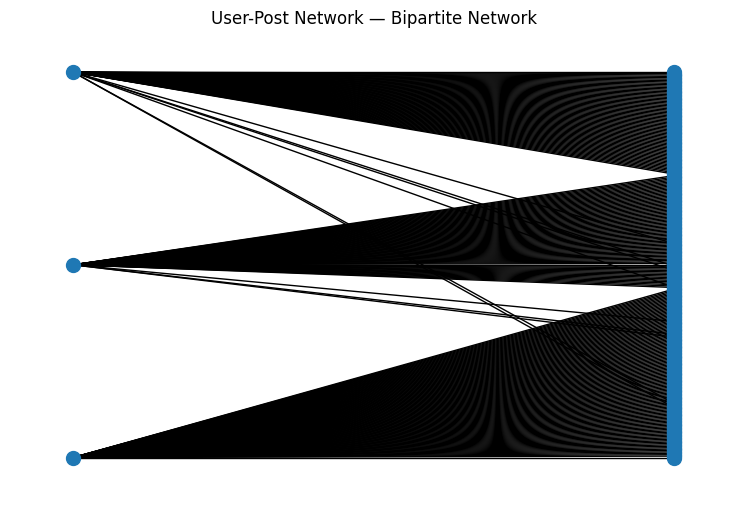

In [25]:
# Bipartite network


# Create empty subplot
plt.figure(figsize=(15, 10))

# User network
plt.subplot(222)

# Create bipartite network of users and posts
bipartite_network = create_user_post_network(comments_df)


pos_bipartite = nx.bipartite_layout(bipartite_network, 
                                   nodes=[n for n, d in bipartite_network.nodes(data=True) 
                                        if d['bipartite']==0])
     # This list comprehension filters the nodes of the bipartite graph to include only 
     # those nodes where the attribute 'bipartite' is 0. 

# Draw the network
nx.draw(bipartite_network, pos_bipartite, node_size=100)

plt.title("User-Post Network — Bipartite Network")




plt.tight_layout()
plt.show()



## Step 6: Visualise Comment Trees

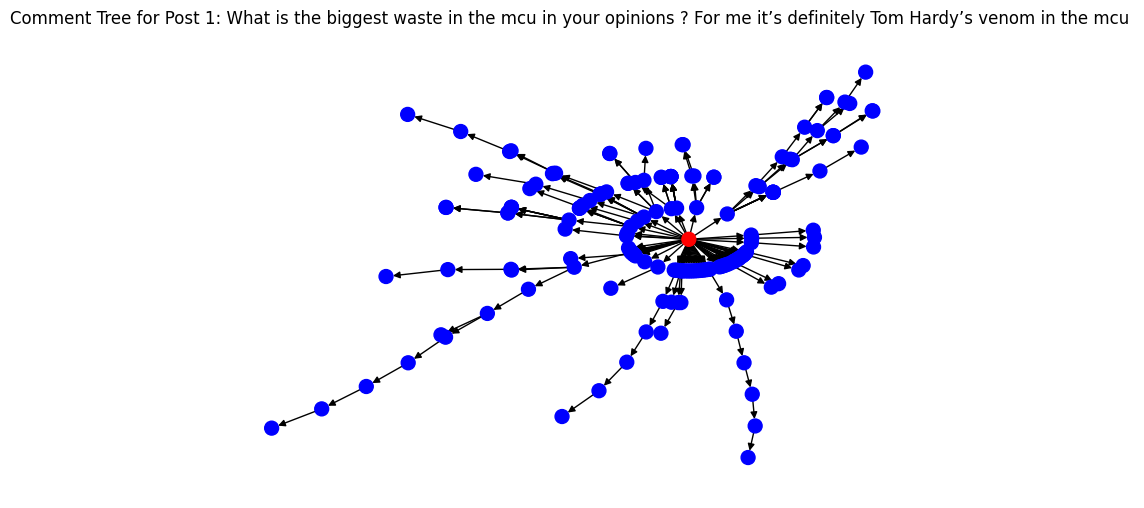

In [19]:
# Comment tree for post 1

# Create empty subplot
plt.figure(figsize=(15, 10))

# Specify subplot
plt.subplot(223)

# Obtain the data that satisfies the criteria
post_1_comments = comments_df[comments_df['post_id'] == posts[0]['id']]

# Create directed network of comments with optional root nodes
comment_tree_1 = create_comment_tree(post_1_comments, include_root=True)

# Position nodes in a graph. 
# Place nodes in such a way that the geometric (Euclidean) distance between them 
# is close to their graph-theoretic distance (shortest path distance)
pos_tree_1 = nx.kamada_kawai_layout(comment_tree_1)

# Draw the network
nx.draw(comment_tree_1, pos_tree_1, node_size=100, 
        node_color=['red' if d['type']=='post' else 'blue' 
                   for _, d in comment_tree_1.nodes(data=True)])

plt.title(f"Comment Tree for Post 1: {posts[0]['title']}")




plt.tight_layout()

plt.show()

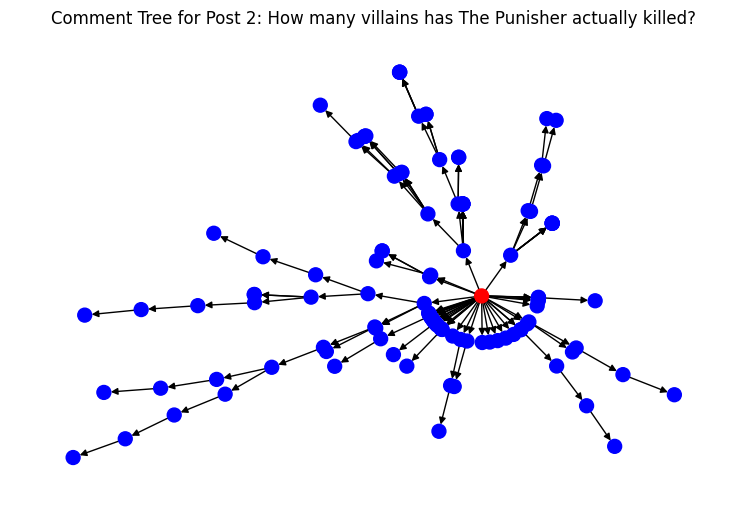

In [26]:
# Comment tree for post 2


# Create empty subplot
plt.figure(figsize=(15, 10))

# Specify subplot
plt.subplot(224)

# Obtain the data that satisfies the criteria
post_2_comments = comments_df[comments_df['post_id'] == posts[1]['id']]

# Create directed network of comments with optional root nodes
comment_tree_2 = create_comment_tree(post_2_comments, include_root=True)

# Position nodes in a graph. 
# Place nodes in such a way that the geometric (Euclidean) distance between them 
# is close to their graph-theoretic distance (shortest path distance)
pos_tree_2 = nx.kamada_kawai_layout(comment_tree_2)

# Draw network graph
nx.draw(comment_tree_2, pos_tree_2, node_size=100, 
        node_color=['red' if d['type']=='post' else 'blue' 
                   for _, d in comment_tree_2.nodes(data=True)])
plt.title(f"Comment Tree for Post 2: {posts[1]['title']}")

plt.tight_layout()
plt.show()

## Step 7: Finding similar users based on different metrics

### Step 7a: Cosine Distance

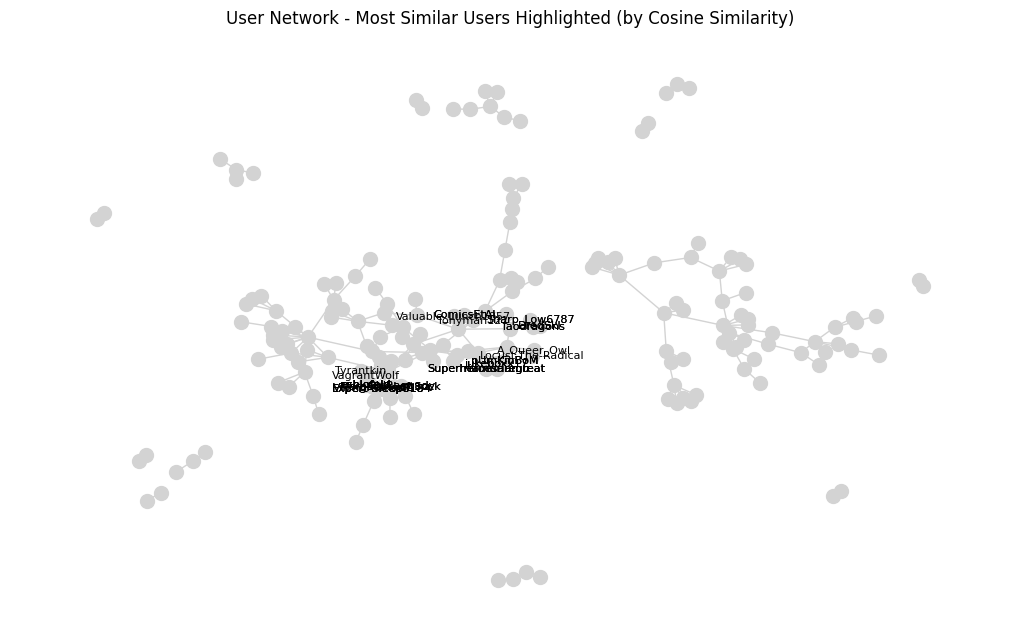

Expert-Sleep8184 - esblofeld: 1.000
Expert-Sleep8184 - OldRaggady: 1.000
Expert-Sleep8184 - VikingRoman7: 1.000
Expert-Sleep8184 - MaraSovsLeftSock: 1.000
esblofeld - OldRaggady: 1.000
esblofeld - VikingRoman7: 1.000
esblofeld - MaraSovsLeftSock: 1.000
Locust-The-Radical - A_Queer_Owl: 1.000
DredSkl - Sharp_Low6787: 1.000
DredSkl - Taodragons: 1.000
Sharp_Low6787 - Taodragons: 1.000
ComicsEtAl - Tonyman121: 1.000
ComicsEtAl - Valuable_Lunch1857: 1.000
pUmKinBoM - riamuriamu: 1.000
pUmKinBoM - Superheroesaregreat: 1.000
pUmKinBoM - jukeboxx17: 1.000
riamuriamu - Superheroesaregreat: 1.000
riamuriamu - jukeboxx17: 1.000
Tyrantkin - VagrantWolf: 1.000
Superheroesaregreat - jukeboxx17: 1.000


In [28]:
# Identify users that are similar based on Cosine Distance
similar_users = find_similar_users(user_network, metric='cosine')


# Visualise similar pairs

# Specify figure size
plt.figure(figsize=(10, 6))

# Arrange nodes in spring_layout position
pos = nx.spring_layout(user_network)

# Draw full network in gray
nx.draw(user_network, pos, node_color='lightgray', 
        edge_color='lightgray', width=1, node_size=100)

# Highlight similar pairs
for user1, user2, sim in similar_users[:20]:
    # Draw edge in red with width proportional to similarity
    nx.draw_networkx_edges(user_network, pos, 
                          edgelist=[(user1, user2)],
                          edge_color='red',
                          width=sim*3)
    
    # Label nodes
    nx.draw_networkx_labels(user_network, pos, 
                           labels={user1: user1, user2: user2},
                           font_size=8)

plt.title("User Network - Most Similar Users Highlighted (by Cosine Similarity)")
plt.show()

# Print similarities
for user1, user2, sim in similar_users[:20]:
    print(f"{user1} - {user2}: {sim:.3f}")

## 7b: Euclidean Distance

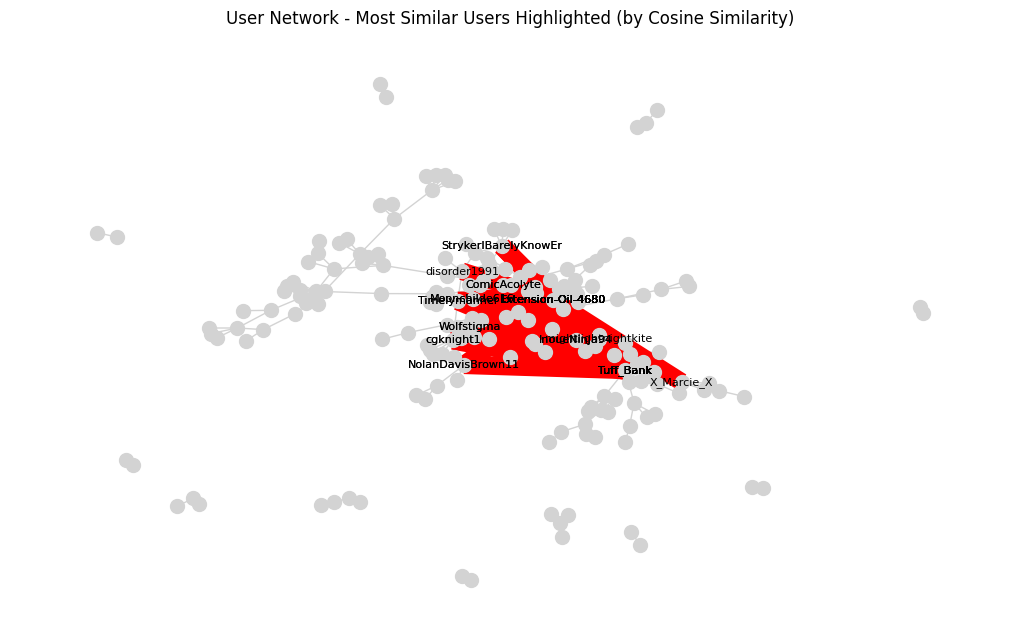

Extension-Oil-4680 - Tuff_Bank: 4.899
Extension-Oil-4680 - cgknight1: 4.796
cgknight1 - Tuff_Bank: 4.796
Extension-Oil-4680 - InoueNinja94: 4.583
Timelymanner - Tuff_Bank: 4.583
InoueNinja94 - Tuff_Bank: 4.583
ComicAcolyte - Tuff_Bank: 4.472
StrykerIBarelyKnowEr - Tuff_Bank: 4.472
Extension-Oil-4680 - Timelymanner: 4.359
Extension-Oil-4680 - Moonchilde616: 4.359
Extension-Oil-4680 - Wolfstigma: 4.359
Extension-Oil-4680 - NolanDavisBrown11: 4.359
Extension-Oil-4680 - mightlightnightkite: 4.359
Moonchilde616 - Tuff_Bank: 4.359
Wolfstigma - Tuff_Bank: 4.359
NolanDavisBrown11 - Tuff_Bank: 4.359
Extension-Oil-4680 - ComicAcolyte: 4.243
Extension-Oil-4680 - disorder1991: 4.243
Extension-Oil-4680 - StrykerIBarelyKnowEr: 4.243
Extension-Oil-4680 - X_Marcie_X: 4.243


In [30]:
# Identify users that are similar based on Euclidean Distance
similar_users = find_similar_users(user_network, metric='euclidean')

# Visualise similar pairs

# Specify figure size
plt.figure(figsize=(10, 6))

# Arrange nodes in spring_layout position
pos = nx.spring_layout(user_network)

# Draw full network in gray
nx.draw(user_network, pos, node_color='lightgray', 
        edge_color='lightgray', width=1, node_size=100)

# Highlight similar pairs
for user1, user2, sim in similar_users[:20]:
    # Draw edge in red with width proportional to similarity
    nx.draw_networkx_edges(user_network, pos, 
                          edgelist=[(user1, user2)],
                          edge_color='red',
                          width=sim*3)
    
    # Label nodes
    nx.draw_networkx_labels(user_network, pos, 
                           labels={user1: user1, user2: user2},
                           font_size=8)

plt.title("User Network - Most Similar Users Highlighted (by Cosine Similarity)")
plt.show()

# Print similarities
for user1, user2, sim in similar_users[:20]:
    print(f"{user1} - {user2}: {sim:.3f}")

### 7c: Jaccard Similarity

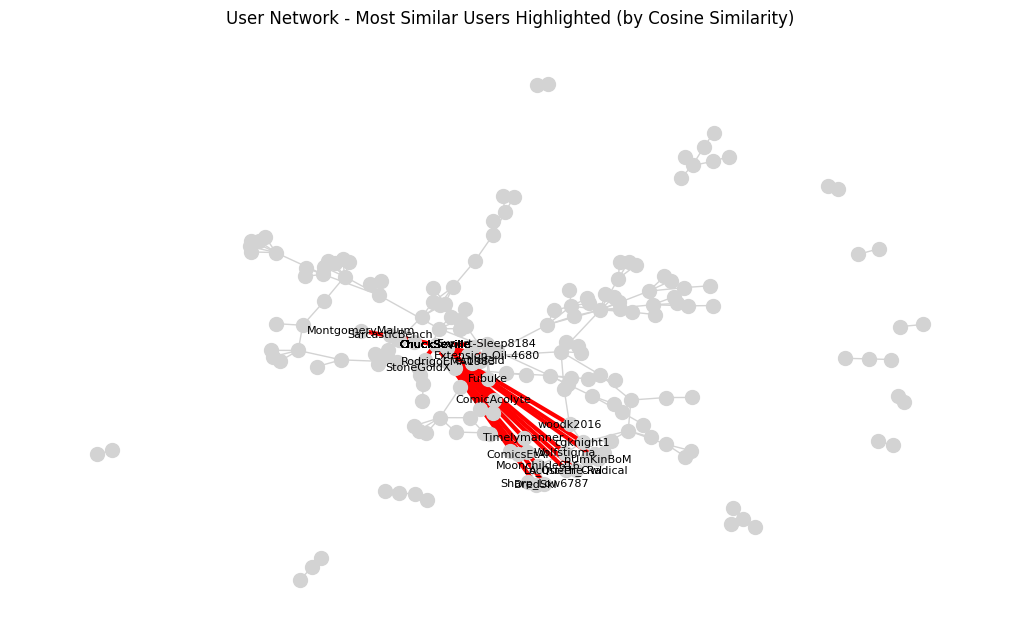

ChuckSeville - Extension-Oil-4680: 1.000
ChuckSeville - SarcasticBench: 1.000
ChuckSeville - MontgomeryMalum: 1.000
ChuckSeville - RodrigoEMA1983: 1.000
ChuckSeville - StoneGoldX: 1.000
ChuckSeville - ComicAcolyte: 1.000
ChuckSeville - Expert-Sleep8184: 1.000
ChuckSeville - esblofeld: 1.000
ChuckSeville - Fubuke: 1.000
ChuckSeville - Timelymanner: 1.000
ChuckSeville - cgknight1: 1.000
ChuckSeville - Moonchilde616: 1.000
ChuckSeville - Wolfstigma: 1.000
ChuckSeville - Locust-The-Radical: 1.000
ChuckSeville - woodk2016: 1.000
ChuckSeville - A_Queer_Owl: 1.000
ChuckSeville - DredSkl: 1.000
ChuckSeville - Sharp_Low6787: 1.000
ChuckSeville - ComicsEtAl: 1.000
ChuckSeville - pUmKinBoM: 1.000


In [31]:
# Identify users that are similar based on Jaccard Similarity
similar_users = find_similar_users(user_network, metric='jaccard')

# Visualise similar pairs

# Specify figure size
plt.figure(figsize=(10, 6))

# Arrange nodes in spring_layout position
pos = nx.spring_layout(user_network)

# Draw full network in gray
nx.draw(user_network, pos, node_color='lightgray', 
        edge_color='lightgray', width=1, node_size=100)

# Highlight similar pairs
for user1, user2, sim in similar_users[:20]:
    # Draw edge in red with width proportional to similarity
    nx.draw_networkx_edges(user_network, pos, 
                          edgelist=[(user1, user2)],
                          edge_color='red',
                          width=sim*3)
    
    # Label nodes
    nx.draw_networkx_labels(user_network, pos, 
                           labels={user1: user1, user2: user2},
                           font_size=8)

plt.title("User Network - Most Similar Users Highlighted (by Cosine Similarity)")
plt.show()

# Print similarities
for user1, user2, sim in similar_users[:20]:
    print(f"{user1} - {user2}: {sim:.3f}")